In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('/Users/anshengmay/Desktop/Projects/Wind quality/playground-series-s3e5/train.csv')
test = pd.read_csv('/Users/anshengmay/Desktop/Projects/Wind quality/playground-series-s3e5/test.csv')

In [4]:
train.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [5]:
train.quality.unique() # ordinal classification

array([6, 7, 5, 4, 8, 3])

In [6]:
train.info() # all numeric, no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2056 non-null   int64  
 1   fixed acidity         2056 non-null   float64
 2   volatile acidity      2056 non-null   float64
 3   citric acid           2056 non-null   float64
 4   residual sugar        2056 non-null   float64
 5   chlorides             2056 non-null   float64
 6   free sulfur dioxide   2056 non-null   float64
 7   total sulfur dioxide  2056 non-null   float64
 8   density               2056 non-null   float64
 9   pH                    2056 non-null   float64
 10  sulphates             2056 non-null   float64
 11  alcohol               2056 non-null   float64
 12  quality               2056 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 208.9 KB


In [7]:
train.describe() # no crazy values

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000
mean,1027.500000,8.365175,0.527601,0.265058,2.398881,0.081856,16.955982,49.236868,0.996748,3.310569,0.641308,10.414972,5.720817
std,593.660397,1.705390,0.173164,0.188267,0.858824,0.023729,10.009710,32.961141,0.001827,0.142321,0.137942,1.028825,0.853146
min,0.000000,5.000000,0.180000,0.000000,1.200000,0.012000,1.000000,7.000000,0.990070,2.740000,0.390000,8.700000,3.000000
25%,513.750000,7.200000,0.390000,0.090000,1.900000,0.071000,8.000000,22.000000,0.995600,3.200000,0.550000,9.500000,5.000000
50%,1027.500000,7.950000,0.520000,0.250000,2.200000,0.079000,16.000000,44.000000,0.996700,3.310000,0.610000,10.100000,6.000000
75%,1541.250000,9.200000,0.640000,0.420000,2.600000,0.090000,24.000000,65.000000,0.997800,3.390000,0.720000,11.000000,6.000000
max,2055.000000,15.900000,1.580000,0.760000,14.000000,0.414000,68.000000,289.000000,1.003690,3.780000,1.950000,14.000000,8.000000


In [8]:
train.columns

Index(['Id', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [9]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       ]

<Axes: >

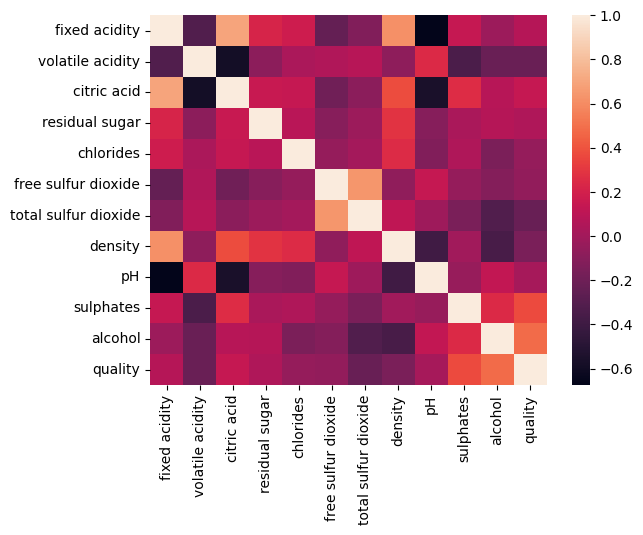

In [10]:
corr = train[cols+['quality']].corr()
sns.heatmap(corr)

In [11]:
len(cols)

11

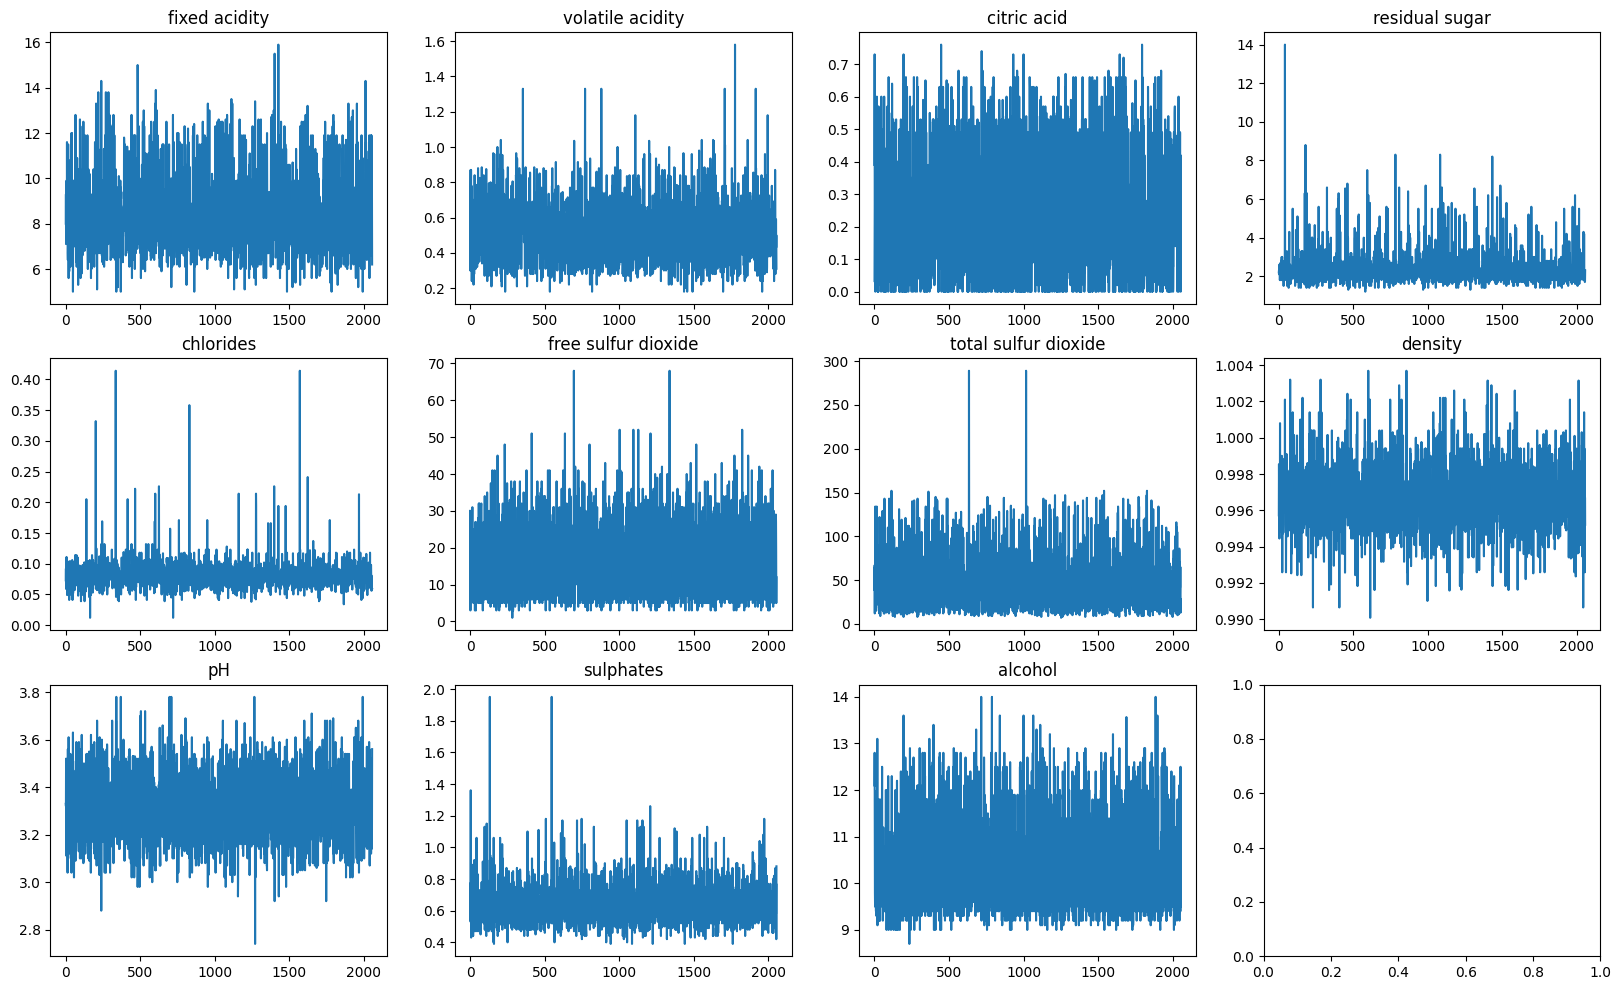

In [12]:
fig, ax = plt.subplots(3,4, figsize=(20,12))
for i in range(len(cols)):
    ax[i//4][i%4].plot(train[cols[i]])
    ax[i//4][i%4].set_title(cols[i])
plt.show()

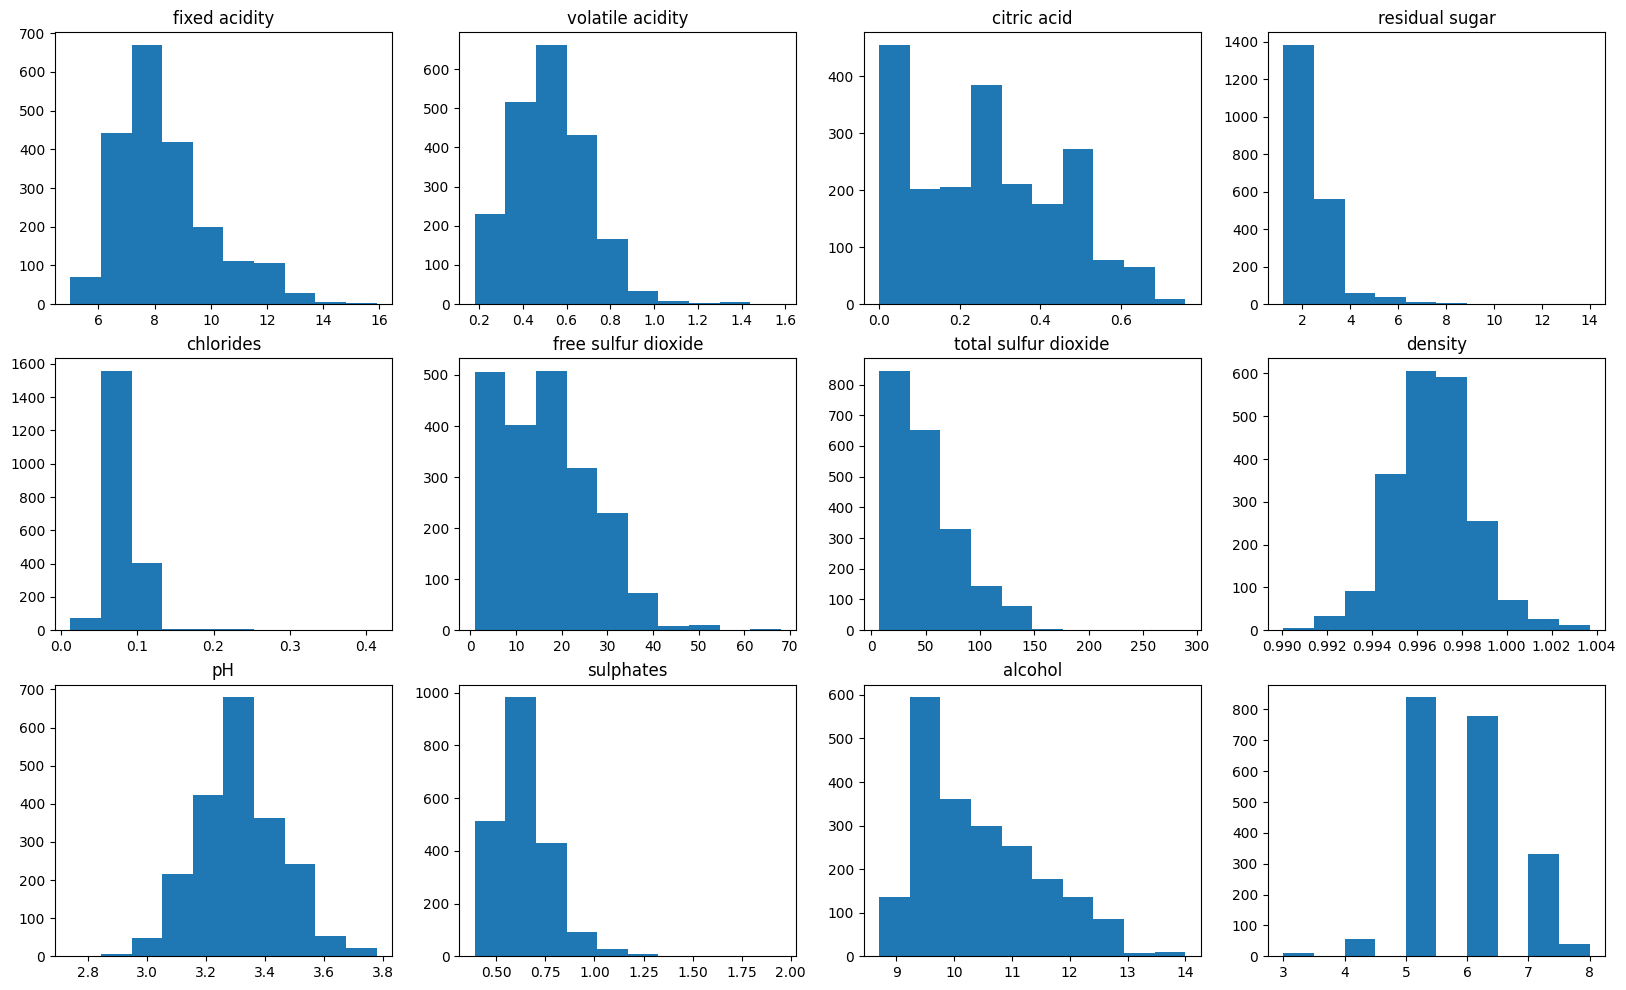

In [13]:
fig, ax = plt.subplots(3,4, figsize=(20,12))
for i in range(len(cols)):
    ax[i//4][i%4].hist(train[cols[i]])
    ax[i//4][i%4].set_title(cols[i])
ax[2][3].hist(train['quality'])
plt.show()

/Users/anshengmay/miniconda3/envs/mlenv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/anshengmay/miniconda3/envs/mlenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


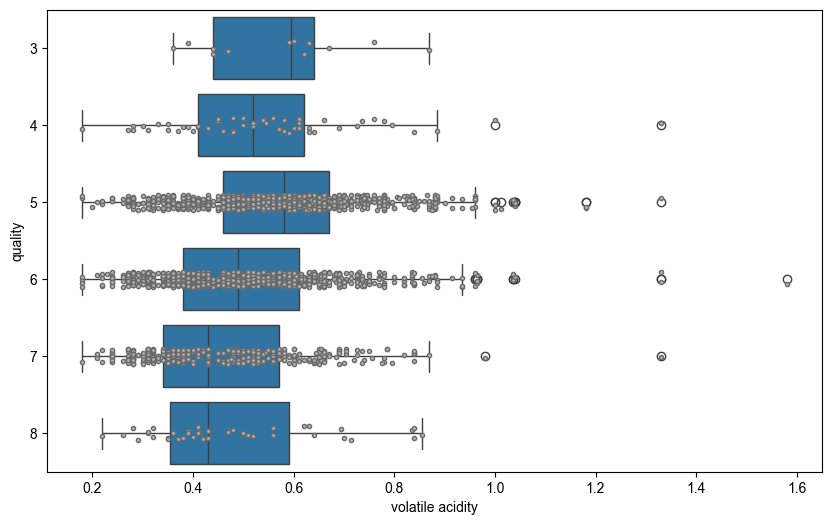

In [40]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=((10,6)))
sns.set_theme(style="ticks")
# Plot train_data with horizontal boxes
sns.boxplot(data=train, x=cols[1], y='quality',orient="h",
            width =.8)

# Add in points to show each observation
sns.stripplot(data=train, x=cols[1], y='quality',orient="h",
             size=3, color=".7", linewidth=1)

plt.show()

/Users/anshengmay/miniconda3/envs/mlenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/anshengmay/miniconda3/envs/mlenv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/anshengmay/miniconda3/envs/mlenv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/anshengmay/miniconda3/envs/mlenv/lib/python3.11/site-packag

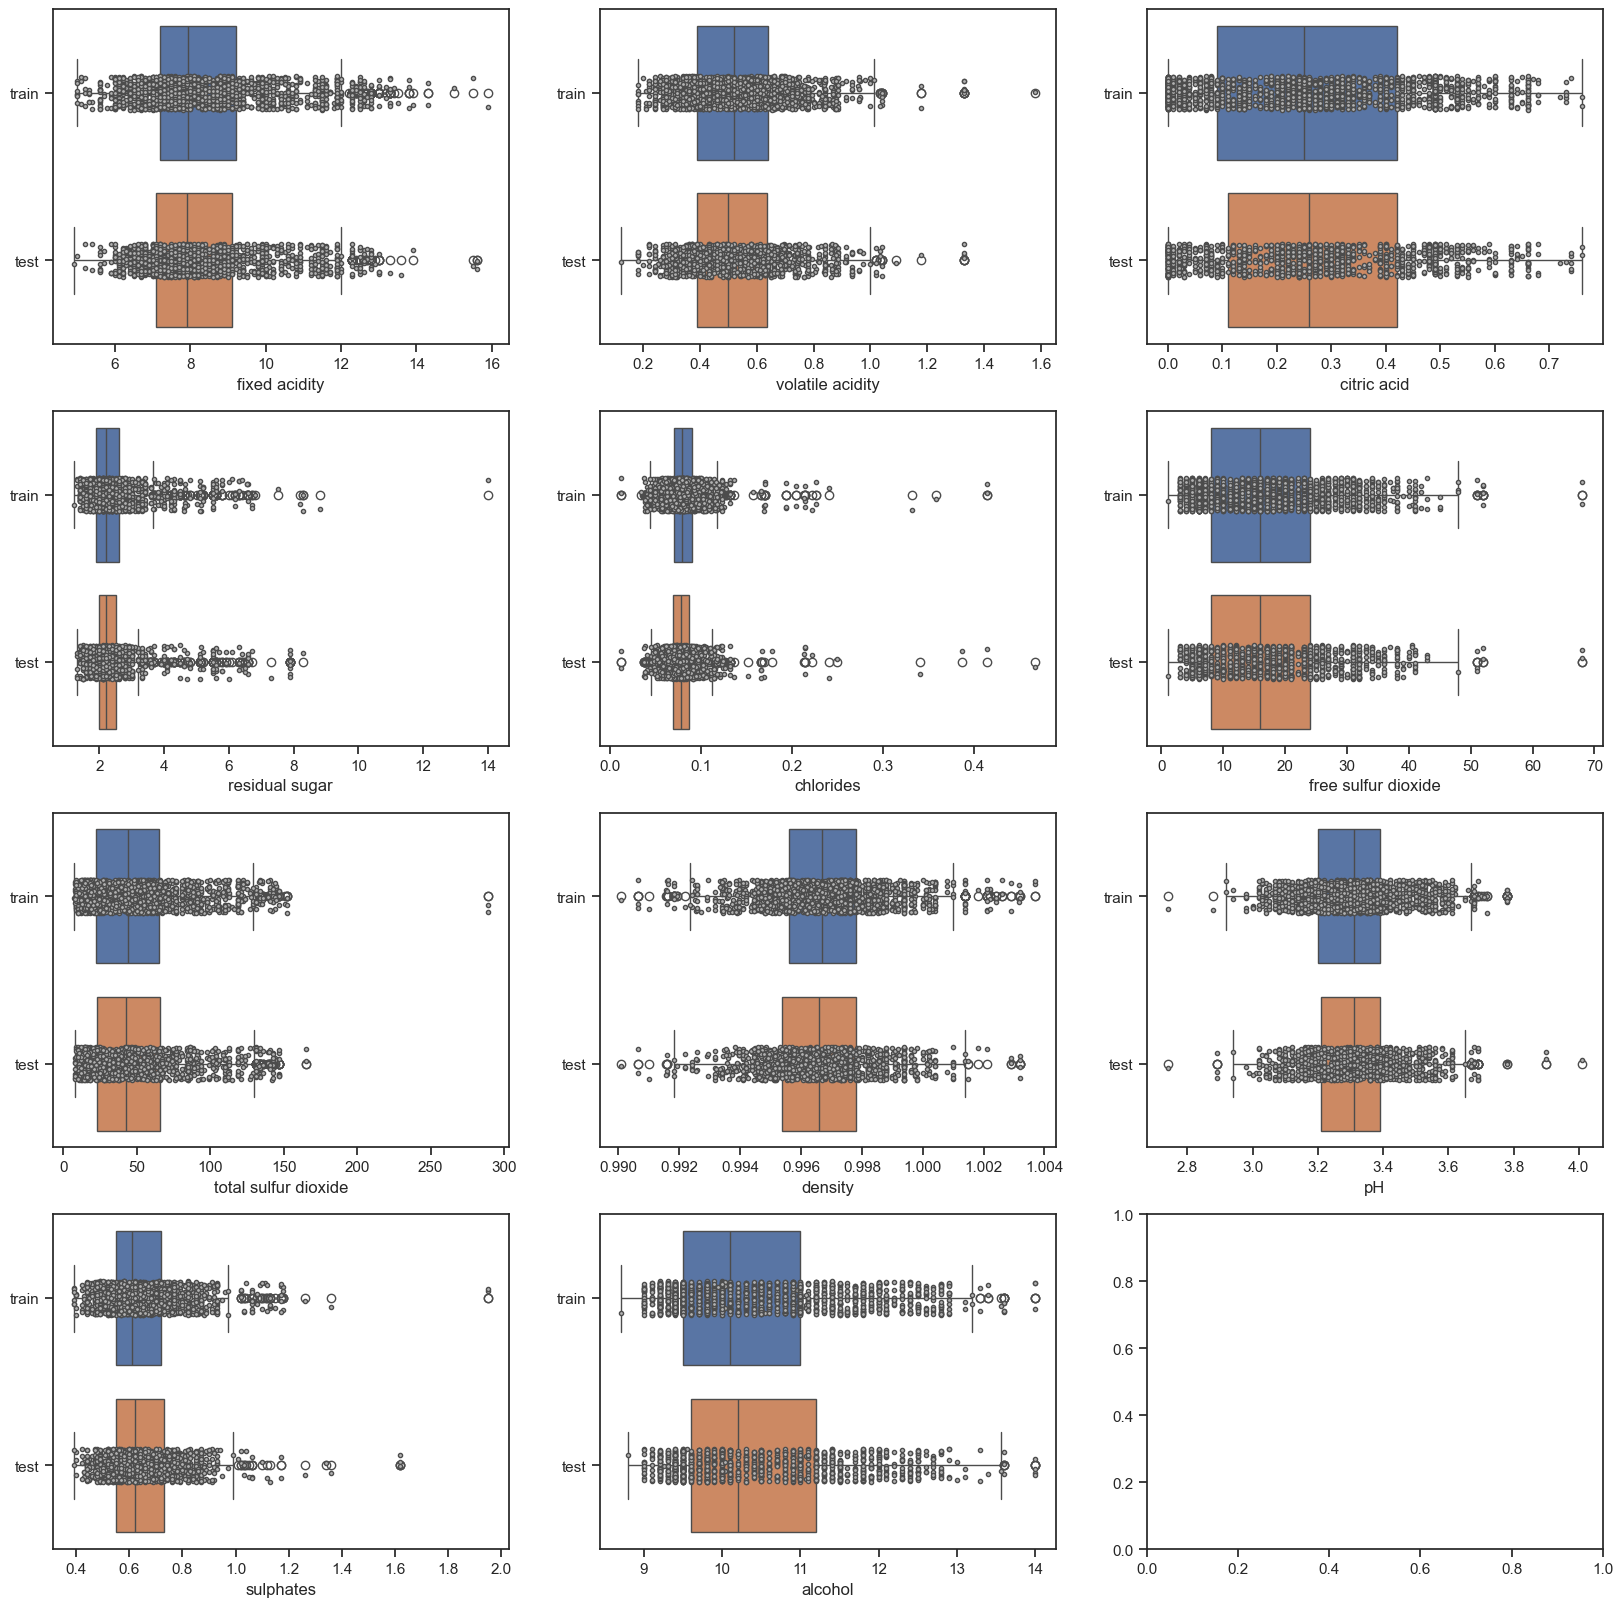

In [42]:
sns.set_theme(style="ticks")
nrows = 4
ncols = 3
f, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=((20,20)))

for i in range(0,11):
    row = i // ncols
    col = i % ncols
    fe = i + 1
    train_fe = train[cols[i]]
    test_fe = test[cols[i]]
    df = pd.Series(train_fe,name="train").to_frame().join(pd.Series(test_fe,name="test"))
    # Draw Boxplots and add in points to show data
    sns.boxplot(data = df,orient="h",width =.8, ax=ax[row,col])
    sns.stripplot(data = df,orient="h",size=3, color=".7", linewidth=1, ax=ax[row,col])
    ax[row,col].set_xlabel(cols[i])
plt.show()

In [14]:
train[train.quality==7].describe()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.0
mean,1072.858859,8.582883,0.465511,0.306456,2.569970,0.081402,16.851351,39.855856,0.996293,3.317658,0.729970,11.189990,7.0
std,575.269833,1.741375,0.161775,0.193417,1.077759,0.022957,10.255309,22.657952,0.001836,0.131715,0.140139,1.041132,0.0
min,2.000000,5.100000,0.180000,0.000000,1.400000,0.039000,3.000000,8.000000,0.990640,2.880000,0.440000,9.200000,7.0
25%,601.000000,7.200000,0.340000,0.150000,2.000000,0.069000,8.000000,21.000000,0.995060,3.230000,0.640000,10.400000,7.0
50%,1070.000000,8.200000,0.430000,0.320000,2.300000,0.078000,15.000000,37.000000,0.996200,3.310000,0.740000,11.000000,7.0
75%,1577.000000,9.800000,0.570000,0.480000,2.700000,0.091000,25.000000,53.000000,0.997430,3.390000,0.820000,12.000000,7.0
max,2055.000000,14.300000,1.330000,0.740000,8.800000,0.241000,51.000000,113.000000,1.002100,3.710000,1.950000,14.000000,7.0


In [15]:
train[train.quality==4].describe()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.0
mean,912.672727,8.080000,0.543182,0.233273,2.377273,0.080691,17.954545,54.690909,0.996969,3.335455,0.615091,9.727273,4.0
std,600.359153,1.660254,0.198963,0.183546,0.859523,0.017833,9.331484,31.129879,0.001339,0.150896,0.171095,0.739733,0.0
min,13.000000,5.800000,0.180000,0.000000,1.500000,0.054000,3.000000,9.000000,0.994680,3.030000,0.430000,8.700000,4.0
25%,403.500000,6.950000,0.410000,0.050000,1.900000,0.069000,8.000000,26.000000,0.995985,3.225000,0.535000,9.300000,4.0
50%,909.000000,7.700000,0.520000,0.240000,2.100000,0.078000,20.000000,51.000000,0.996920,3.310000,0.550000,9.500000,4.0
75%,1515.500000,9.000000,0.620000,0.320000,2.500000,0.088000,25.000000,68.500000,0.997980,3.455000,0.640000,9.950000,4.0
max,2025.000000,13.500000,1.330000,0.660000,6.000000,0.171000,37.500000,119.000000,1.000400,3.620000,1.150000,12.300000,4.0


### issues
1. imbalanced target: 5,6 too many, 7, medium, 3,8,4 not much

In [16]:
# split data
from sklearn.model_selection import train_test_split
X = train[cols]
y = train['quality']

X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.25, random_state=49)

In [17]:
# scale numerical data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)


In [18]:
X_test = scaler.transform(X_test)

In [19]:
# treat as a classification problem
# logistic classification
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_pred = logreg.predict(X_test)

In [21]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_pred, y_test)

0.2583530946914091

In [22]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
cohen_kappa_score(y_pred, y_test)

0.2968449981903062

In [23]:
y_train_xgb = y_train-3
y_test_xgb = y_test-3

In [24]:
# xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train_xgb)
y_pred = xgb.predict(X_test)
cohen_kappa_score(y_pred, y_test_xgb)

0.26935639970965397

In [25]:
test_scaled = scaler.transform(test[cols])
pred = rf.predict(test_scaled)

In [32]:
test_pred_quality = pd.DataFrame(pred,columns=["quality"]) 
res = pd.concat([test['Id'], test_pred_quality], axis=1)

In [37]:
res.to_csv('result.csv', index=False)

In [38]:
res

,Id,quality
0,2056,5
1,2057,6
2,2058,6
3,2059,6
4,2060,6
...,...,...
1367,3423,5
1368,3424,6
1369,3425,6
1370,3426,5


In [44]:
import xgboost as xgb

In [50]:
y_xgb = y-3

In [51]:
# split data
tr_x, va_x, tr_y, va_y = train_test_split(X, y_xgb, 
                                          test_size = 0.3, 
                                          random_state=0, 
                                          stratify=y
                                          )

# contain features and target to the data matrix of xgboost
dtrain = xgb.DMatrix(tr_x, label=tr_y)
dvalid = xgb.DMatrix(va_x, label=va_y)
dvax= xgb.DMatrix(va_x)

# set hyperparameters
params = {'objective': 'multi:softprob',
          'eval_metric' : "mlogloss",
          'num_class': 6,
          'eta': 0.1,
          'gamma' :0.0,
          'alpha': 0.0,
          'lamda':1.0,
          'min_child_weight' :8,
          'max_depth': 5,
          'subsample' : 0.9,
          'colsample_bytree':1.0,
          'colsample_bylevel':0.4,
          'random_state': 71,
          }
num_round = 10000

# run train 

watchlist = [(dtrain, "train"), (dvalid , "eval")]
model = xgb.train(params, 
                  dtrain,
                  num_round,
                  evals=watchlist,
                  verbose_eval =100,
                  early_stopping_rounds=100
                  )

[0]	train-mlogloss:1.68762	eval-mlogloss:1.69598


/Users/anshengmay/miniconda3/envs/mlenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [15:14:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "lamda" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	train-mlogloss:0.59601	eval-mlogloss:1.02308
[165]	train-mlogloss:0.47604	eval-mlogloss:1.06192


In [66]:
# predict

dtest = xgb.DMatrix(test[cols])
test_pred_prob = model.predict(dtest)
# , ntree_limit=model.best_ntree_limit)
test_pred_max = np.argmax(test_pred_prob, axis=1) # max column number of each rows

In [ ]:
# Cross Validation

preds_tests = []

skf = StratifiedKFold(n_splits= 2, shuffle=True, random_state=71)

# split data
for _, (ids_train, ids_valid) in enumerate(skf.split(x,y_shift)):
    tr_x  = x.loc[ids_train, : ]
    va_x = x.loc[ids_valid, : ]
    tr_y  = y_shift.loc[ids_train]
    va_y = y_shift.loc[ids_valid]

    #num_class = 

    # contain features and target to the data matrix of xgboost
    dtrain = xgb.DMatrix(tr_x, label=tr_y)
    dvalid = xgb.DMatrix(va_x, label=va_y)
    dvax= xgb.DMatrix(va_x)
    dtest = xgb.DMatrix(test_x)

    # set hyperparameters
    params = {'objective': 'multi:softprob',
              'eval_metric' : "mlogloss",
              'num_class': 6,
              'eta': 0.1,
              'gamma' :0.0,
              'alpha': 0.0,
              'lamda':1.0,
              'min_child_weight' :8,
              'max_depth': 5,
              'subsample' : 0.9,
              'colsample_bytree':1.0,
              'colsample_bylevel':0.4,
              'random_state': 71,
              }
    num_round = 10000

    # run train 

    watchlist = [(dtrain, "train"), (dvalid , "eval")]
    model = xgb.train(params, 
                      dtrain,
                      num_round,
                      evals=watchlist,
                      verbose_eval =100,
                      early_stopping_rounds=100
                      )
    
    va_x_pred_prob = model.predict(dvax, ntree_limit=model.best_ntree_limit)

    va_x_pred_exp = va_x_pred_prob * range(6)
    va_x_pred_serial = va_x_pred_exp.sum(axis=1)